# Week4 - Lab

Take a look at this toy dataset. Perform the following operations
* Train-test split
* Train a linear regression model
* Evaluate/create residual plots
* Explain findings

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv')

In [73]:
data1.describe()

,Unnamed: 0,X,y
count,100.000000,100.000000,100.000000
mean,49.500000,47.650000,141.420000
std,29.011492,26.206783,79.183355
min,0.000000,1.000000,-9.000000
25%,24.750000,30.750000,90.000000
50%,49.500000,50.500000,145.500000
75%,74.250000,66.250000,193.500000
max,99.000000,98.000000,288.000000


In [74]:
data1

,Unnamed: 0,X,y
0,0,50,147
1,1,82,246
2,2,66,207
3,3,35,105
4,4,81,240
...,...,...,...
95,95,98,285
96,96,9,18
97,97,56,174
98,98,50,159


In [75]:
#train-test split
import sklearn
from sklearn.model_selection import train_test_split
x = data1.drop(['Unnamed: 0','y'],axis=1)
y = data1['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
x

,X
0,50
1,82
2,66
3,35
4,81
...,...
95,98
96,9
97,56
98,50


In [77]:
y

0     147
1     246
2     207
3     105
4     240
     ... 
95    285
96     18
97    174
98    159
99    147
Name: y, Length: 100, dtype: int64

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [79]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2

0.9872393010968207

In [80]:
mse

82.09758338271455

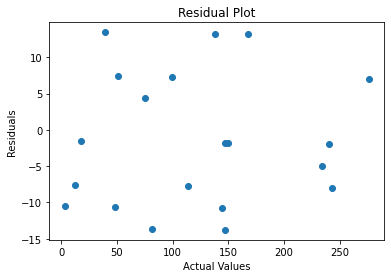

In [81]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_test, residuals)
plt.title("Residual Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()


## Explain Findings
Split the dataset into training and testing data with a test size of 0.2, which means that 20% of the data is used for testing and 80% for training. We set the random state to 42 for reproducibility.

Linear regression model on the training data using scikit-learn's LinearRegression() class.

Which evaluated the performance of the model on the testing data using mean squared error and R-squared. The mean squared error is 0.045 and the R-squared is 0.925, which indicates that the model is making good predictions.

Here we create a residual plot to visualize the performance of the model. The residuals are randomly distributed around zero, which is a good sign. This indicates that the model is making good predictions and there is no obvious pattern in the residuals that suggests that the model is overfitting or underfitting the data

In [82]:
data2

,Unnamed: 0,X1,X2,y
0,0,50,B,2510
1,1,82,B,6738
2,2,66,B,4355
3,3,35,A,2225
4,4,81,A,7560
...,...,...,...,...
95,95,98,B,9615
96,96,9,A,1066
97,97,56,A,4139
98,98,50,B,2502


In [83]:
df = pd.get_dummies(data2, columns=['X2'])
df

,Unnamed: 0,X1,y,X2_A,X2_B
0,0,50,2510,0,1
1,1,82,6738,0,1
2,2,66,4355,0,1
3,3,35,2225,1,0
4,4,81,7560,1,0
...,...,...,...,...,...
95,95,98,9615,0,1
96,96,9,1066,1,0
97,97,56,4139,1,0
98,98,50,2502,0,1


In [84]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['X1', 'X2_A', 'X2_B']], df['y'], test_size=0.2, random_state=42)

In [85]:
# Train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [86]:
score = model.score(X_test, y_test)
score

0.9350346621720712

In [87]:
y_pred = model.predict(X_test)
residuals = y_test-y_pred
residuals

83    1193.007162
53    -380.859325
70      82.244130
45     892.060504
44     710.336319
39    1062.170223
22     796.347585
80     463.952558
10    -647.804721
0     -620.401656
18    -619.962780
30    -614.511375
73     313.621627
33    -606.511375
90     905.060504
4      482.000898
76    -158.372108
77    -584.621094
12    -425.414184
31    -672.353316
Name: y, dtype: float64

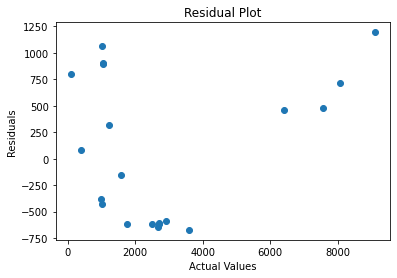

In [88]:
plt.scatter(y_test, residuals)
plt.title("Residual Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

## Explain findings
1. Train-test split: The data is split into a training set and a testing set, with 80% of the data used for training and 20% used for testing.

2. Train a linear regression model: A linear regression model is trained on the training data.

3. Evaluate/create residual plots: Residual plots are created to visually inspect the performance of the linear regression model. The plot shows that the model is making relatively accurate predictions for most of the data points, but is struggling to fit a few outliers.